# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
#You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [8]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


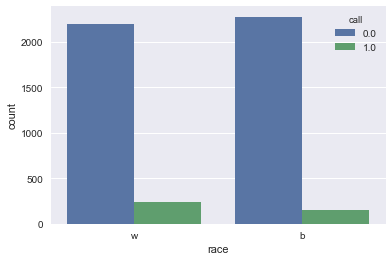

In [9]:
_ = sns.countplot(x='race',hue='call', data=data)

### 1. What test is appropriate for this problem? Does CLT apply?
### 2. What are the null and alternate hypotheses?
### 3. Compute margin of error, confidence interval, and p-value.
### 4. Write a story describing the statistical significance in the context or the original problem.
### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

In [10]:
# 1.
# Since we do not know the population SD, we cannot do z test. So t test is appropriate for this problem. 
# Since we have 2 sample b and w, we would be doing 2 sample t tests

### Conditions for CLT
# The samples must be independent
# The sample size must be “big enough

## For #1 above, as said in the problem, the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.
## For #2 above, the sample size is 4870, and the population size (number of interviewers) is obviously 10 times 4870.
# So the conditions of CLt are met. So, yes CLT applies.

In [11]:
# 2.
# H0: Race has no significant impact on the rate of callback for resumes
# Ha: Race has significant impact on the rate of callback for resumes

In [12]:
# 3.
# two sample t-test

b_call = data[data['race'] == 'b'][['call']]
w_call = data[data['race'] == 'w'][['call']]
tot_call = np.concatenate((b_call['call'], w_call['call']))

In [13]:
tot_call

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [14]:
two_sample = stats.ttest_ind(b_call, w_call)
print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is -4.115 and the p-value is 0.000.


In [15]:
mean = np.mean(tot_call)
sigma = np.std(tot_call)
sem = sigma/np.sqrt(len(tot_call))
print("Mean: ", mean)
print("Sigma: ", sigma)
print("Std. Error of Mean: ", sem)

Mean:  0.0804928
Sigma:  0.272055
Std. Error of Mean:  0.00389844723663


In [16]:
ci_lower, ci_upper = stats.norm.interval(0.95, loc=mean, scale=sem)

In [17]:
print(ci_lower, ci_upper)

0.072852000686 0.0881336330449


In [18]:
MarginOfError = ci_upper - mean
print("Margin of Error :", MarginOfError)

Margin of Error : 0.00764081617942


In [19]:
## Another way to calculate the confidence intervals
z_critical = stats.norm.ppf(q = 0.975) # We use 0.975 instead of q = 0.95 because the distribution has two tails.
print("z-critical value:", z_critical)  

z-critical value: 1.95996398454


In [20]:
margin_of_error = z_critical * sem

confidence_interval = (mean - margin_of_error,
                       mean + margin_of_error)  

print("Confidence interval:",confidence_interval)

Confidence interval: (0.072852000686020019, 0.088133633044868348)


In [21]:
### Since the p-value < 0.05, we reject the Null hypothesis and conclude that race has significant impact on the rate of callback for resumes